<a href="https://colab.research.google.com/github/ArthurLima05/TransferLearningTest/blob/main/IdentificadorElianeLuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Transfer Learning

Neste projeto, aplicaremos a técnica de **Transfer Learning** utilizando o modelo pré-treinado **VGG16** para classificar imagens de duas classes personalizadas: **Fotos do meu pai e minha mãe**. A ideia é usar um número pequeno de imagens para treinar o modelo e conseguir distinguir com alta precisão entre essas duas classes, mesmo com um dataset reduzido.

Vamos explorar o uso de **keras** e **TensorFlow**, ferramentas poderosas para construção de redes neurais profundas.


In [ ]:
%matplotlib inline

import os
import random
import numpy as np
import keras
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

* %matplotlib inline: Mostra gráficos diretamente no notebook.
* os: Permite manipular arquivos e variáveis de ambiente.
* random e numpy: Usados para gerar números aleatórios e manipular arrays.
* keras: Biblioteca de deep learning usada para criar e treinar a rede neural.
* matplotlib e imshow: Para visualizar imagens e gráficos.
* keras.layers: Define camadas (convolucionais, pooling, fully connected) para o modelo de rede neural.
* keras.models: Cria e gerencia o modelo da rede neural.





In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np
import os

drive.mount('/content/drive')

def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

dataset_path = "/content/drive/MyDrive/DataSetElianeLuiz"
classes = ["Eliane", "Luiz"]

data = []

# Carregando as imagens
for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):  # Verifica se é realmente um diretório
        print(f"Diretório {class_path} encontrado.")
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img_data = get_image(img_path)
            data.append((img_data, label))
    else:
        print(f"Diretório {class_path} não encontrado. Verifique o nome e o caminho.")

# Verificando a quantidade de imagens
print("Carregando imagens de:")
for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [f for f in os.listdir(class_path) if os.path.splitext(f)[1].lower() in ['.jpeg', '.jpg']]  # Inclui múltiplos formatos
    print(f"Classe {class_name}: {len(image_files)} imagens.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diretório /content/drive/MyDrive/DataSetElianeLuiz/Eliane encontrado.
Diretório /content/drive/MyDrive/DataSetElianeLuiz/Luiz encontrado.
Carregando imagens de:
Classe Eliane: 60 imagens.
Classe Luiz: 60 imagens.


In [ ]:
data_augmentation = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
      for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = img_array.reshape((1, ) + img_array.shape)  # Adiciona uma dimensão extra para o gerador

        # Gera 5 imagens aumentadas por arquivo
        i = 0
        for batch in data_augmentation.flow(img_array, batch_size=1,
                                                save_to_dir=class_path,
                                                save_prefix='ag',
                                                save_format='jpeg'):
          i += 1
          if i >= 5:  # Define quantas imagens aumentadas serão criadas por arquivo
            break

In [ ]:
random.shuffle(data)

In [ ]:
train_split = 0.7
val_split = 0.15

train_size = int(len(data) * train_split)
val_size = int(len(data) * val_split)

train_data = data[:train_size]
val_data = data[train_size:train_size + val_size]
test_data = data[train_size + val_size:]



In [ ]:
# Separando X (imagens) e y (rótulos)
x_train, y_train = np.array([t[0] for t in train_data]), [t[1] for t in train_data]
x_val, y_val = np.array([t[0] for t in val_data]), [t[1] for t in val_data]
x_test, y_test = np.array([t[0] for t in test_data]), [t[1] for t in test_data]

x_train = x_train.squeeze()
x_val = x_val.squeeze()
x_test = x_test.squeeze()

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
num_classes = len(classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(18, 2)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), len(classes)))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 120 images from 2 categories
train / validation / test split: 84, 18, 18
training data shape:  (84, 224, 224, 3)
training labels shape:  (84, 2)


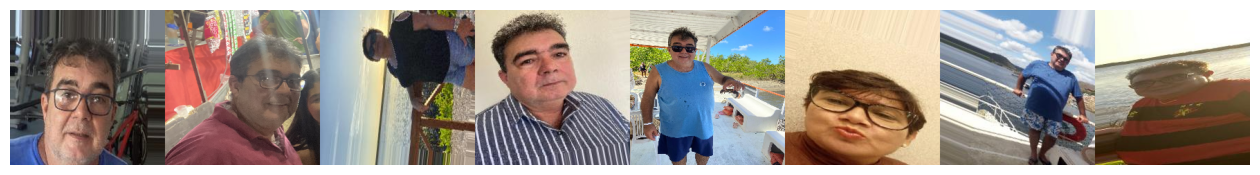

In [ ]:
images = []
for category in classes:
    class_path = os.path.join(dataset_path, category)
    images += [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]

# Selecionando aleatoriamente 8 imagens
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]

# Concatenando as imagens selecionadas para exibição
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)

# Exibindo as imagens
plt.figure(figsize=(16, 4))
plt.imshow(concat_image)
plt.axis('off')  # Desativa o eixo
plt.show()

In [ ]:
model = Sequential()

# Primeira camada de entrada
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))



# Primeira camada convolucional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda camada convolucional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout após o pooling
model.add(Dropout(0.25))

# Terceira camada convolucional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Quarta camada convolucional
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout após o pooling
model.add(Dropout(0.25))

# Camada totalmente conectada
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

# Dropout na camada totalmente conectada
model.add(Dropout(0.5))

# Camada de saída com 2 classes
model.add(Dense(2))
model.add(Activation('softmax'))

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 220, 220, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 108, 108, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 1,218,306 (4.65 MB)

 Trainable params: 1,218,306 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_data=(x_val, y_val))


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5119 - loss: 0.6932 - val_accuracy: 0.6111 - val_loss: 0.6471
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.5595 - loss: 0.7134 - val_accuracy: 0.3889 - val_loss: 0.8838
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 0.7528 - val_accuracy: 0.3889 - val_loss: 0.7583
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.4881 - loss: 0.6694 - val_accuracy: 0.3889 - val_loss: 0.6930
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.7500 - loss: 0.6446 - val_accuracy: 0.7222 - val_loss: 0.6683
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.6190 - loss: 0.6518 - val_accuracy: 0.7778 - val_loss: 0.6541
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5833 - loss: 0.6526 - val_accuracy: 0.7778 - val_loss: 0.6437
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.7024 - loss: 0.6201 - val_accuracy: 0.7222 - val_loss: 0.6382


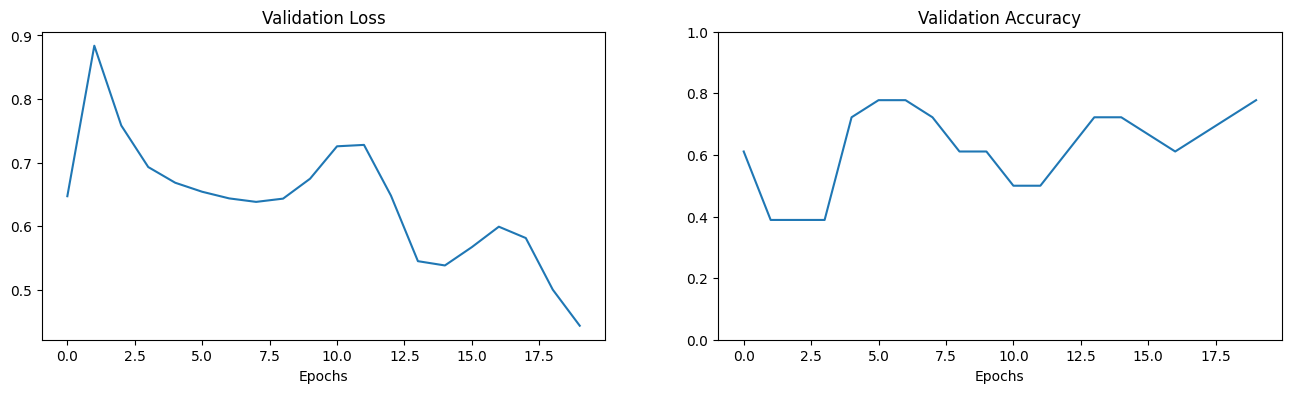

In [ ]:
import matplotlib.pyplot as plt

# Criando a figura
fig = plt.figure(figsize=(16, 4))

# Primeiro gráfico: val_loss
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("Validation Loss")
ax.set_xlabel("Epochs")

# Segundo gráfico: val_accuracy
ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])  # Usando 'val_accuracy' ao invés de 'val_acc'
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0, 1)

# Exibindo o gráfico
plt.show()


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.49868902564048767
Test accuracy: 0.6666666865348816


In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Fixar as camadas do VGG16 (não treinar novamente)
for layer in vgg.layers:
    layer.trainable = False

# Adicionar novas camadas de classificação
x = GlobalAveragePooling2D()(vgg.output)  # Pooling global para reduzir a dimensionalidade
x = Dense(1024, activation='relu')(x)     # Camada densa
output = Dense(num_classes, activation='softmax')(x)  # Nova camada de saída (softmax)

# Criar o novo modelo
model_new = Model(inputs=vgg.input, outputs=output)

In [ ]:
# Congelar todas as camadas, exceto a última
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# Garantir que a última camada seja treinável
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

# Compilar o modelo com a função de perda e otimizador
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Visualizar a arquitetura do modelo
model_new.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 15,242,050 (58.14 MB)

 Trainable params: 2,050 (8.01 KB)

 Non-trainable params: 15,240,000 (58.14 MB)

In [ ]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=15,
                         validation_data=(x_val, y_val))


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 66s 66s/step - accuracy: 0.5952 - loss: 0.6961 - val_accuracy: 0.5556 - val_loss: 0.6946
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 79s 79s/step - accuracy: 0.4762 - loss: 0.6971 - val_accuracy: 0.4444 - val_loss: 0.7111
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - accuracy: 0.4524 - loss: 0.7013 - val_accuracy: 0.5000 - val_loss: 0.7097
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 85s 85s/step - accuracy: 0.4405 - loss: 0.6980 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 63s 63s/step - accuracy: 0.5000 - loss: 0.6909 - val_accuracy: 0.5000 - val_loss: 0.6854
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 85s 85s/step - accuracy: 0.5833 - loss: 0.6850 - val_accuracy: 0.6111 - val_loss: 0.6757
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 87s 87s/step - accuracy: 0.5952 - loss: 0.6826 - val_accuracy: 0.5556 - val_loss: 0.6707
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 74s 74s/step - accuracy: 0.5833 - loss: 0.6823 - val_accuracy: 0.5556 - val_loss: 0.6692


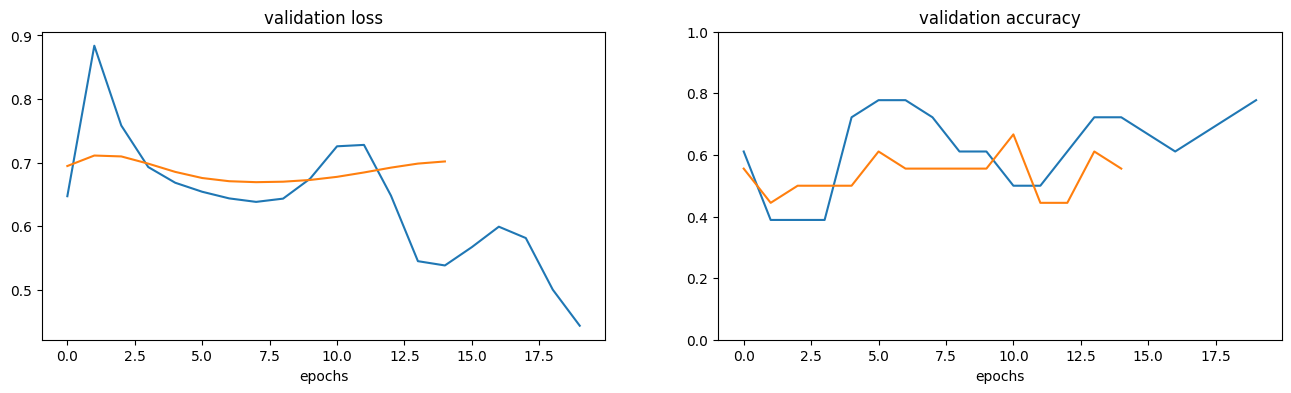

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Carregar a imagem
img_path = '/content/drive/MyDrive/testeEliane.jpg'  # Substitua pelo caminho da sua imagem
img = image.load_img(img_path, target_size=(224, 224))  # Ajuste o tamanho conforme necessário

# Pré-processamento
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalizar se necessário


In [ ]:
prediction = model.predict(img_array)
class_index = np.argmax(prediction, axis=1)

# Mapear para as classes
class_names = ['Eliane', 'Luiz']  # Ajuste com os nomes reais
predicted_class = class_names[class_index[0]]
print(f'A imagem é de: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
A imagem é de: Luiz
